C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


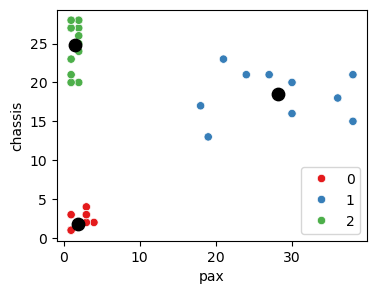

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/vehicle-type.csv')
df = df[df['pax'].notnull()]
df2 = df[['pax','chassis']]

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df3 = pd.DataFrame()
df3[['pax','chassis']] = scale.fit_transform(df2)

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(df3)

plt.figure(figsize=[4,3])
sns.scatterplot(data = df2, x = 'pax', y = 'chassis'
                , hue = model.labels_, palette = 'Set1')
center = scale.inverse_transform(model.cluster_centers_)
plt.scatter(center[:,0],center[:,1]
            , s = 80, c = 'k')
plt.show()

In [6]:
df = pd.read_excel('./data/animals.xlsx')

In [7]:
df.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,No,Yes,Mammals
1,Python,Cold,No,No,No,No,Reptiles
2,Bat,Warm,Yes,Yes,No,Yes,Mammals
3,Frog,Cold,No,No,Sometimes,Yes,Amphibians
4,Salmon,Cold,No,No,Yes,No,Fishes


In [8]:
df['Live_In_Water'].unique()

array(['No', 'Sometimes', 'Yes'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder( categories = [['No', 'Sometimes', 'Yes']])

In [13]:
df['Live_In_Water'] = OE.fit_transform( df[['Live_In_Water']])

In [16]:
df.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,0.0,Yes,Mammals
1,Python,Cold,No,No,0.0,No,Reptiles
2,Bat,Warm,Yes,Yes,0.0,Yes,Mammals
3,Frog,Cold,No,No,1.0,Yes,Amphibians
4,Salmon,Cold,No,No,2.0,No,Fishes


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
OHE = OneHotEncoder( handle_unknown='ignore', sparse_output = False).set_output( transform = 'pandas')

In [23]:
sp = OHE.fit_transform(df[['Species']])

In [26]:
df2 = pd.concat([df,sp], axis =1)

In [27]:
df2.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species,Species_Amphibians,Species_Birds,Species_Fishes,Species_Mammals,Species_Reptiles
0,Human,Warm,Yes,No,0.0,Yes,Mammals,0.0,0.0,0.0,1.0,0.0
1,Python,Cold,No,No,0.0,No,Reptiles,0.0,0.0,0.0,0.0,1.0
2,Bat,Warm,Yes,Yes,0.0,Yes,Mammals,0.0,0.0,0.0,1.0,0.0
3,Frog,Cold,No,No,1.0,Yes,Amphibians,1.0,0.0,0.0,0.0,0.0
4,Salmon,Cold,No,No,2.0,No,Fishes,0.0,0.0,1.0,0.0,0.0


In [227]:
df = pd.read_excel('./data/shirt_size.xlsx')
att = df[['Height_cms', 'Weight_kgs']]
label = df['T_Shirt_Size']

In [228]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 3)

In [229]:
model.fit(att,label)

KNeighborsClassifier(n_neighbors=3)

In [230]:
model.predict([[170,60]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['L'], dtype=object)

In [231]:
label_predict = model.predict(att)
from sklearn.metrics import accuracy_score
score = accuracy_score(label, label_predict)
score

1.0

In [232]:
pd.DataFrame({'Label':label.values , 'Predict':label_predict})

,Label,Predict
0,M,M
1,M,M
2,L,L
3,L,L
4,L,L
5,M,M
6,M,M
7,L,L
8,L,L
9,M,M


# Lab 10

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('./data/customer.xlsx')

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder( categories = [df['gender'].unique()])
df['gender'] = OE.fit_transform( df[['gender']])

df2 = pd.DataFrame()
df2 = df[['gender', 'age', 'salary']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = pd.DataFrame()
df3[['gender', 'age', 'salary']] = scaler.fit_transform(df2)

att = df3
label = df['purchased']
from sklearn.model_selection import train_test_split
att_train, att_test, label_train, label_test = train_test_split(att, label, train_size = 0.8, random_state= 0)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(att_train,label_train)

label_predict = model.predict(att_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(label_test, label_predict)
score

0.95

In [102]:
model.predict(scaler.transform([[0,25,50000]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Lab 10 การบ้าน

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Smartphone_Usage_Productivity_Dataset_50000.csv')

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder( categories = [df['Device_Type'].unique()])
df['Device_Type'] = OE.fit_transform(df[['Device_Type']])

df2 = pd.DataFrame()
df2 = df[['App_Usage_Count', 'Weekend_Screen_Time_Hours']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = pd.DataFrame()
df3[['App_Usage_Count', 'Weekend_Screen_Time_Hours']] = scaler.fit_transform(df2)

att = df3
label = df['Device_Type']
from sklearn.model_selection import train_test_split
att_train, att_test, label_train, label_test = train_test_split(att, label, train_size = 0.8, random_state= 0)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(att_train,label_train)

label_predict = model.predict(att_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(label_test, label_predict)
score

0.5003

In [234]:
model.predict(scaler.transform([[5.7,3,43]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [266]:
df2

,App_Usage_Count,Weekend_Screen_Time_Hours
0,42,8.7
1,51,5.1
2,14,6.3
3,36,12.8
4,37,9.9
...,...,...
49995,11,3.0
49996,20,6.2
49997,39,5.1
49998,51,9.2


In [267]:
pd.DataFrame({'Label':label_test , 'Predict':label_predict})

,Label,Predict
11841,1.0,1.0
19602,0.0,1.0
45519,0.0,0.0
25747,1.0,1.0
42642,1.0,0.0
...,...,...
25091,0.0,1.0
27853,1.0,0.0
47278,0.0,1.0
37020,1.0,0.0


In [254]:
df

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours
0,U1,58,Male,0.0,Android,1.3,6.7,6,8.8,4,42,1,8.7
1,U2,25,Male,0.0,Android,1.2,1.5,5,6.4,1,51,3,5.1
2,U3,19,Male,1.0,iOS,5.3,5.7,5,9.0,4,14,5,6.3
3,U4,35,Female,2.0,iOS,5.8,2.5,2,5.7,3,36,6,12.8
4,U5,33,Male,3.0,Android,7.9,1.3,4,5.7,3,37,5,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U49996,44,Male,2.0,Android,5.9,5.4,5,6.6,1,11,5,3.0
49996,U49997,42,Other,2.0,Android,2.9,7.4,9,6.3,2,20,4,6.2
49997,U49998,27,Female,3.0,iOS,1.4,2.5,4,6.7,9,39,4,5.1
49998,U49999,41,Female,2.0,iOS,8.9,3.0,6,5.5,2,51,0,9.2


In [257]:
df2

,Sleep_Hours,Stress_Level,App_Usage_Count
0,8.8,4,42
1,6.4,1,51
2,9.0,4,14
3,5.7,3,36
4,5.7,3,37
...,...,...,...
49995,6.6,1,11
49996,6.3,2,20
49997,6.7,9,39
49998,5.5,2,51


In [259]:
df['Device_Type'].unique()

array(['Android', 'iOS'], dtype=object)